In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor,colorbar,plot,show
%matplotlib inline

In [311]:
data=pd.read_csv('Credit_Card_Applications.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [312]:
scaler=MinMaxScaler(feature_range=(0,1))

In [313]:
X=scaler.fit_transform(X)

In [314]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [315]:
som.random_weights_init(X)

In [316]:
som.train_random(X,10000)

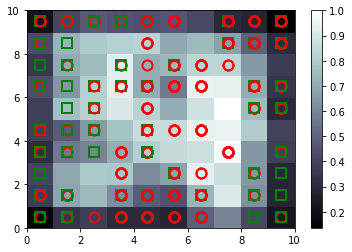

In [317]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

In [318]:
mappings=som.win_map(X)

In [319]:
fraud=mappings[(8,1)]

In [320]:
fraud=scaler.inverse_transform(fraud)

In [321]:
pd.DataFrame(fraud)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15618410.0,1.0,23.08,2.500,2.0,8.0,4.0,1.085,1.0,1.0,11.0,1.0,2.0,60.0,2185.0
1,15617348.0,1.0,63.33,0.540,2.0,8.0,4.0,0.585,1.0,1.0,3.0,1.0,2.0,180.0,1.0
2,15671769.0,1.0,56.75,12.250,2.0,7.0,4.0,1.250,1.0,1.0,4.0,1.0,2.0,200.0,1.0
3,15638989.0,1.0,25.00,12.000,2.0,4.0,4.0,2.250,1.0,1.0,2.0,1.0,2.0,120.0,6.0
4,15728010.0,1.0,60.08,14.500,2.0,1.0,1.0,18.000,1.0,1.0,15.0,1.0,2.0,0.0,1001.0
5,15689268.0,1.0,54.58,9.415,2.0,1.0,1.0,14.415,1.0,1.0,11.0,1.0,2.0,30.0,301.0
6,15568878.0,1.0,31.57,4.000,2.0,14.0,4.0,5.000,1.0,1.0,3.0,1.0,2.0,290.0,2280.0
7,15638871.0,1.0,28.25,0.875,2.0,7.0,4.0,0.960,1.0,1.0,3.0,1.0,2.0,396.0,1.0
8,15607746.0,1.0,39.08,6.000,2.0,7.0,4.0,1.290,1.0,1.0,5.0,1.0,2.0,108.0,1098.0
9,15605276.0,1.0,19.67,0.375,2.0,11.0,4.0,2.000,1.0,1.0,2.0,1.0,2.0,80.0,1.0
